#### Given the following data set, use the sklearn package to find the co-efficients of the
#### line that describes the following relationships:
#### 1) x1 and y
#### 2) x2 and y
#### 3) x3 and y
#### Also, plot the line and the data using matplotlib and report the co-efficient of
#### determination for the lines using the metrics library.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [3]:
data.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
df = data[:15]

In [5]:
df.head(20)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [6]:
from sklearn.linear_model import LinearRegression
X = df.drop('sales',axis=1)

In [17]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
lm.fit(X,df.sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print(lm.intercept_)
print(lm.coef_)

3.040610598249053
[ 0.05461004  0.17104816 -0.02717817]


In [10]:
#Dataframe consisting of feature and coefficients
feat_coeff= pd.DataFrame({'features':X.columns,'estimated cofficients':lm.coef_})
#feat_coeff.columns = ['features','estimated coefficients']
feat_coeff.head(15)

,features,estimated cofficients
0,TV,0.054610
1,radio,0.171048
2,newspaper,-0.027178


Text(0, 0.5, 'sales')

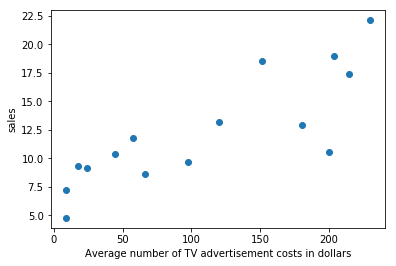

In [11]:
plt.scatter(df.TV,df.sales)
plt.xlabel('Average number of TV advertisement costs in dollars')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

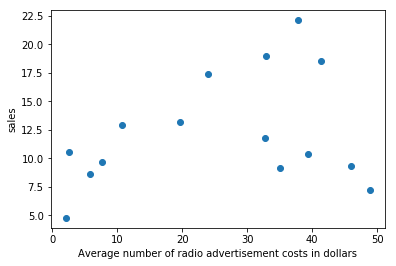

In [12]:
plt.scatter(df.radio,df.sales)
plt.xlabel('Average number of radio advertisement costs in dollars')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

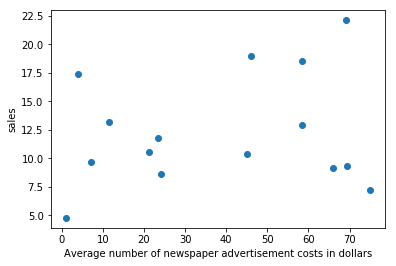

In [13]:
plt.scatter(df.newspaper,df.sales)
plt.xlabel('Average number of newspaper advertisement costs in dollars')
plt.ylabel('sales')

In [14]:
lm.predict(X)

array([20.19127298, 10.96721478,  9.9475667 , 16.78839842, 13.17422173,
        9.84161023, 11.15238079, 12.64201512,  3.84227995, 13.82024558,
        6.98470218, 18.76183034,  8.55307867,  9.46937315, 18.56380937])

Text(0.5, 1.0, 'sales vs Predicted sales')

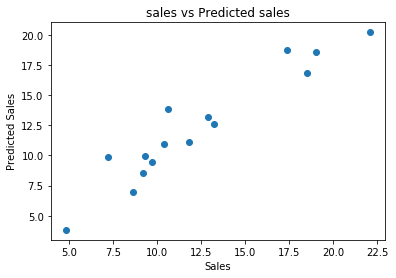

In [15]:
plt.scatter(df.sales,lm.predict(X))
plt.xlabel("Sales")
plt.ylabel("Predicted Sales")
plt.title("sales vs Predicted sales")

In [16]:
#calculating the mean squared error

msefull = np.mean((df.sales - lm.predict(X)) ** 2)
print(msefull)

2.1007260260735268


In [23]:
#calculating the R2 value
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
r2 = r2_score(df.sales, lm.predict(X))
print(r2)

0.9058300713916905
